In [ ]:
"""
Source: https://archive.ics.uci.edu/ml/datasets/wine+quality
"""

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from itertools import permutations
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('winequality-red.csv')

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


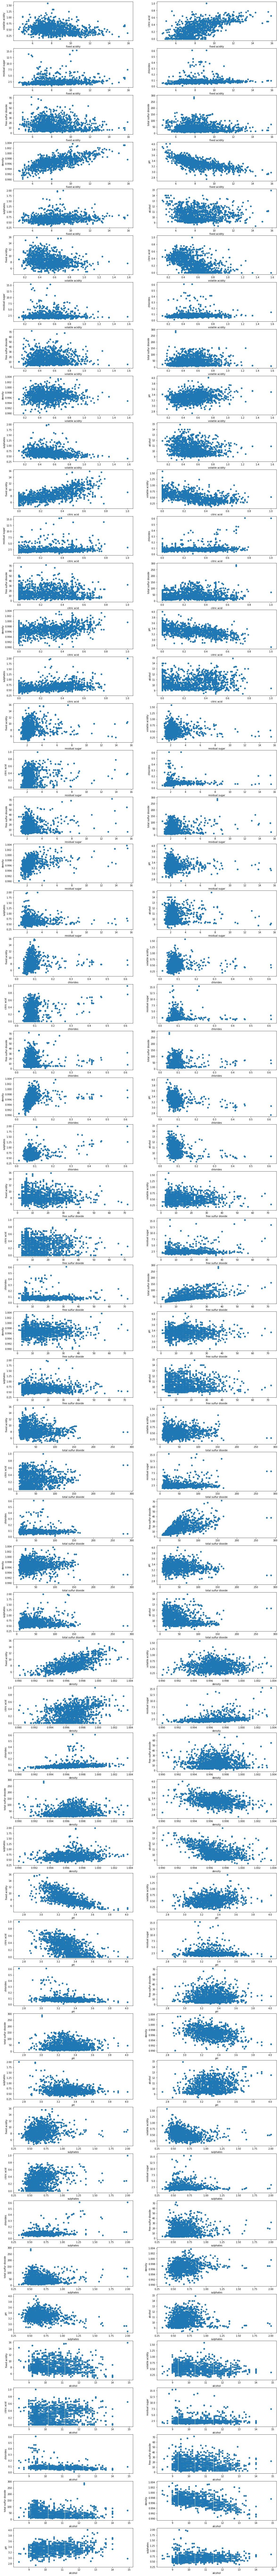

In [11]:
indices = data.columns[:11]
fig, axes = plt.subplots(nrows=55, ncols=2, figsize=(20,200))

i = 1
for p in permutations(indices, 2):
   plt.subplot(55,2,i)
   X = data[p[0]].values.reshape(-1,1)
   Y = data[p[1]].values.reshape(-1,1)
  
   plt.xlabel(p[0])
   plt.ylabel(p[1])
   plt.scatter(X,Y)
   i += 1


In [ ]:
"""
We can see how each of 2 features depends of each other.
Also, it can help to choose the features, in which approximations will be done.
"""

0.01270908783524886
0.4664592142560905


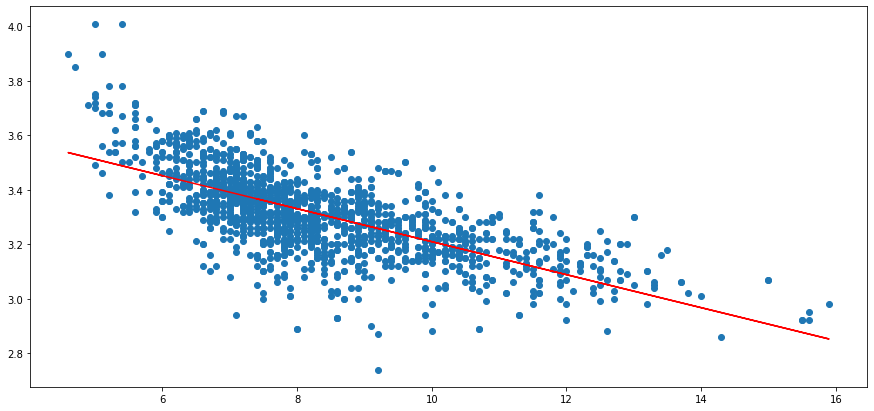

In [12]:
X = data['fixed acidity'].values.reshape(-1,1)
Y = data['pH'].values.reshape(-1,1)

model = LinearRegression()

_ = model.fit(X,Y)
y_pred = model.predict(X)

plt.figure(figsize=(15,7))
plt.plot(X, y_pred, c='red')
plt.scatter(X, Y)

print(mean_squared_error(y_pred,Y))
print(model.score(X,Y))

In [ ]:
"""
MSE is very small, what doesn't mean that the approximation is good. MSE is small, because most values of features are small.
The score is only 0.47.
"""

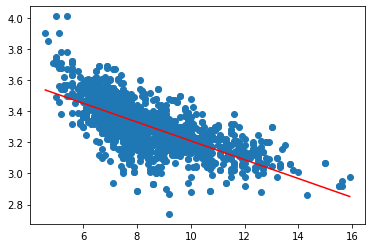

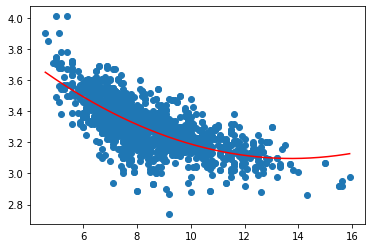

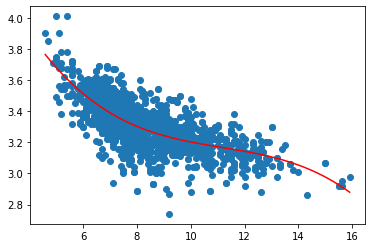

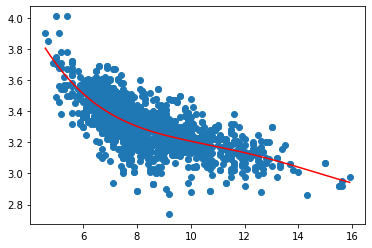

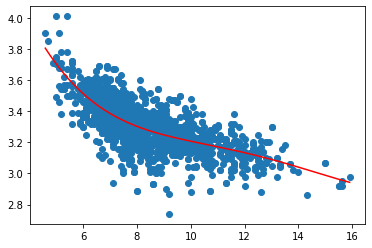

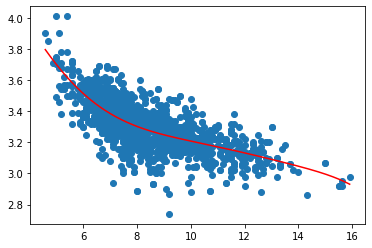

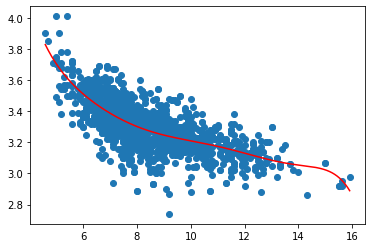

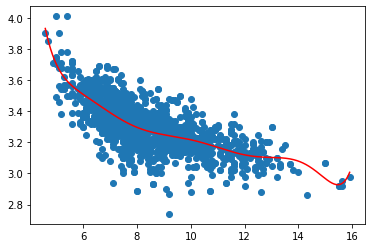

In [13]:
Y_error = []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    _ = model.fit(X_order,Y)
    Y_order = model.predict(X_order)

    x_model = np.linspace(np.min(X), np.max(X), 1000)
    y_model = [model.intercept_ + np.dot(model.coef_, np.power(x, range(1,order+1))) for x in x_model]
    
    plt.plot(x_model, y_model ,color='red')
    plt.scatter(X,Y)
    
    Y_error.append(mean_squared_error(Y,Y_order)) 

    plt.show()

In [ ]:
"""
The line fits better in the scatter plot with each degree of polynomial.
"""

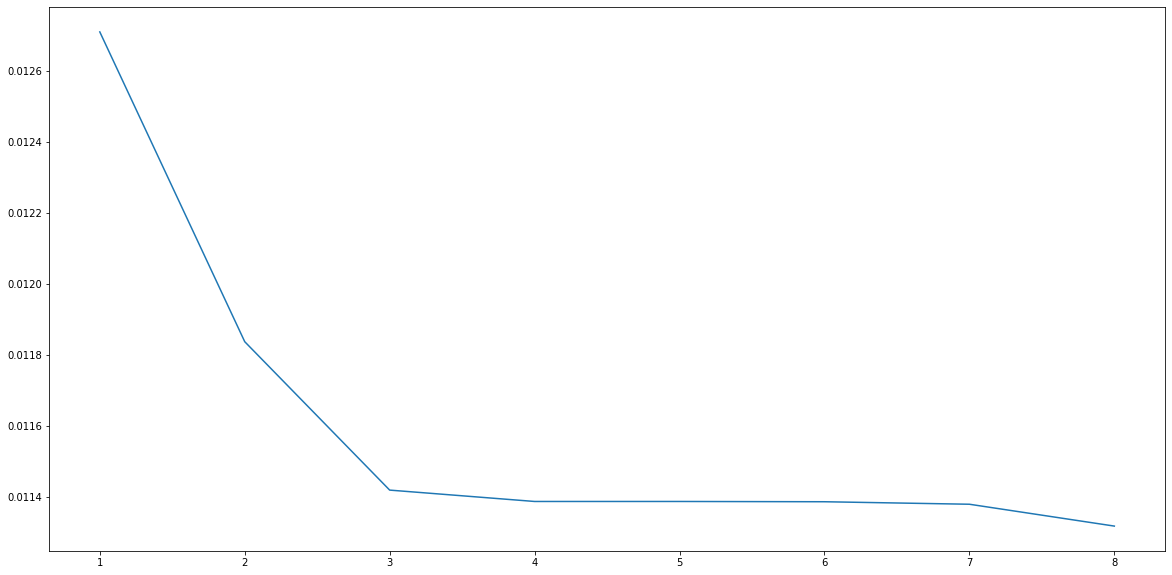

In [14]:

xs = []

for i in range(1,9):
    xs.append(i)

plt.figure(figsize=(20,10))
plt.plot(xs,Y_error)
plt.show()

In [ ]:
"""
MSE is decreasing with each degree of polynomial.
"""

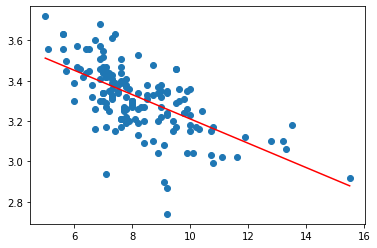

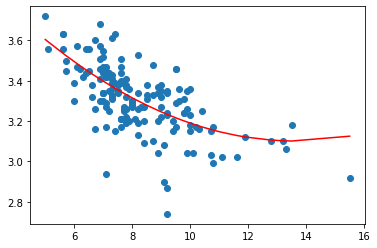

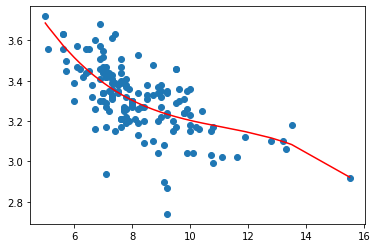

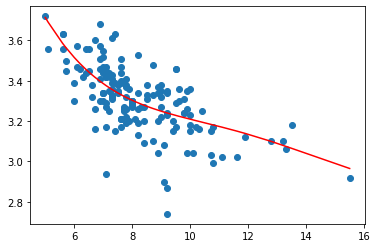

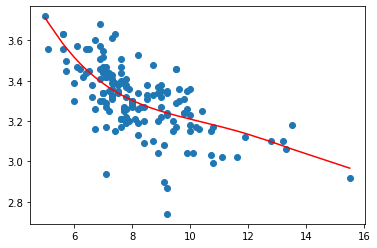

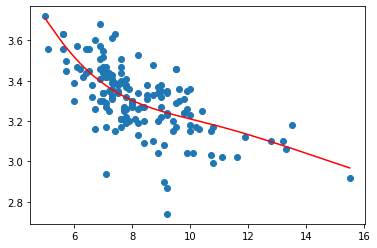

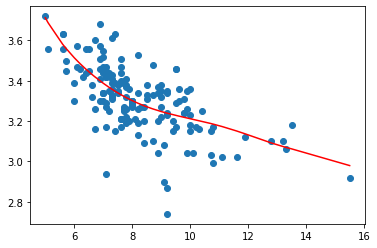

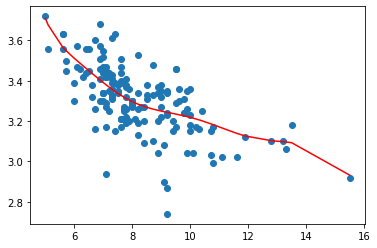

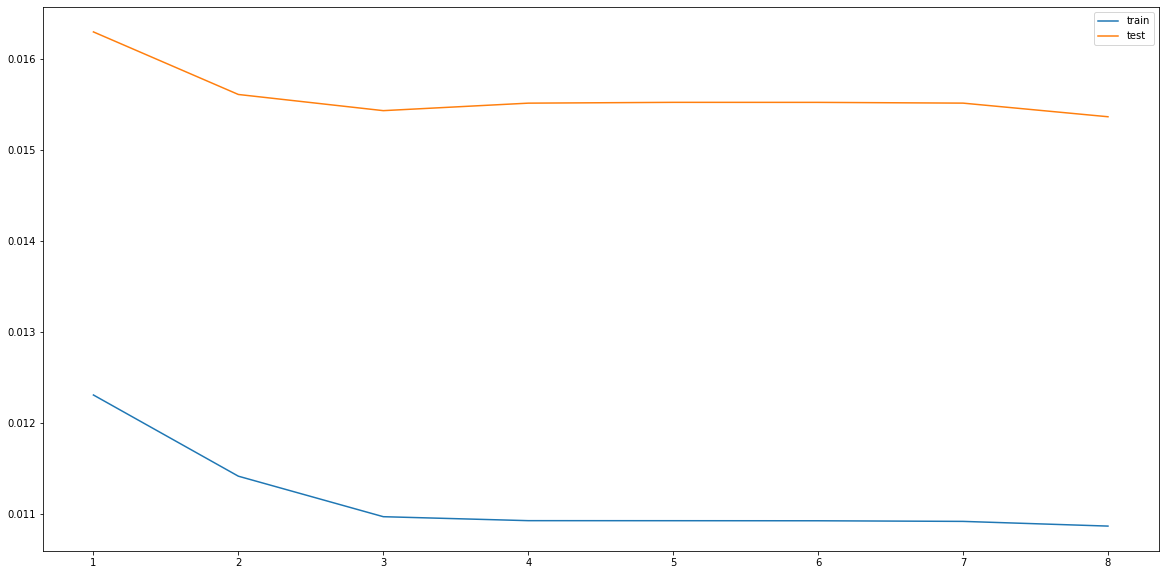

In [15]:
train_error = []
test_error = []

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, Y, test_size=0.1, random_state=44)

    _ = model.fit(X_train, y_train)

    Y_trained = model.predict(X_train)
    Y_order = model.predict(X_test)

    train_error.append(mean_squared_error(Y_trained, y_train))
    test_error.append(mean_squared_error(y_test,Y_order))

    axes, ys = zip(*sorted(zip(X_test[:,0], Y_order)))

    plt.scatter(X_test[:,0], y_test)
    plt.plot(axes, ys, color = 'red')
    plt.show()
    
plt.figure(figsize=(20,10))
plt.plot(xs, train_error, label ='train')
plt.plot(xs, test_error, label = 'test')
plt.legend()
plt.show()

In [ ]:
"""
After spliting data to training and testing set, we can notice that the model is able to make better predictions on
training set, but MSE of testing set isn't increasing, so we dont't dealing with overfitting.
"""

In [16]:
X = data.loc[:,data.columns[0:11]].values
y = data['quality'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

_ = model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.37856225436583746
0.30508172074084616


In [ ]:
"""
Case when X == fixed acidity and Y == pH was used, because these data are easy to expose on plot.
Normally, we use to be interested about if we can predict quality of wine using the features.
After slitig the data, we can notice, that the score for training set, as well as the score for testing set, is very low.
It means that it is very hard to predict quality of wine, even if we use all the features.
"""

In [17]:
feat_labels = data.columns[0:11]
forest = RandomForestClassifier(n_estimators=1000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X,np.ravel(y))
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

 1) alcohol                        0.145731
 2) sulphates                      0.109876
 3) volatile acidity               0.103809
 4) total sulfur dioxide           0.103207
 5) density                        0.091809
 6) chlorides                      0.081282
 7) fixed acidity                  0.076023
 8) pH                             0.075739
 9) citric acid                    0.074808
10) residual sugar                 0.070744
11) free sulfur dioxide            0.066971


In [ ]:
"""
Using RandomForestClassifier, we can check which features have the greatest impact on the quality of the wine.
"""

In [18]:
X = data[['alcohol','sulphates','volatile acidity','total sulfur dioxide','density']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

_ = model.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))


0.35947040217514464
0.29879866142766787


In [ ]:
"""
After taking only the top 5 features, we want to check that maybe in that case the testing score will be 
closer to the training score. As we can see, the difference has decreased by 0.01, but the score is still very low.
"""